In [20]:
import pandas as pd
from sklearn import datasets


In [21]:
# loading the iris dataset
iris=datasets.load_iris()

In [22]:
# creating the dataframe out of the dataset
iris_X=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
iris_y=pd.DataFrame(iris.target,columns=['target'])
iris_y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [24]:
# combining the target variable and feature dataset
iris_combined=pd.concat([iris_X,iris_y],axis=1)
iris_combined

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [25]:
# getting the quantiles for the feature dataset to get inter quantile range
Q1=iris_X.quantile(0.25)
Q3=iris_X.quantile(0.75)
print(Q1)
print(Q3)

sepal length (cm)    5.1
sepal width (cm)     2.8
petal length (cm)    1.6
petal width (cm)     0.3
Name: 0.25, dtype: float64
sepal length (cm)    6.4
sepal width (cm)     3.3
petal length (cm)    5.1
petal width (cm)     1.8
Name: 0.75, dtype: float64


In [26]:
# getting the inter quantile range
IQR=Q3-Q1

In [27]:
import seaborn as sns

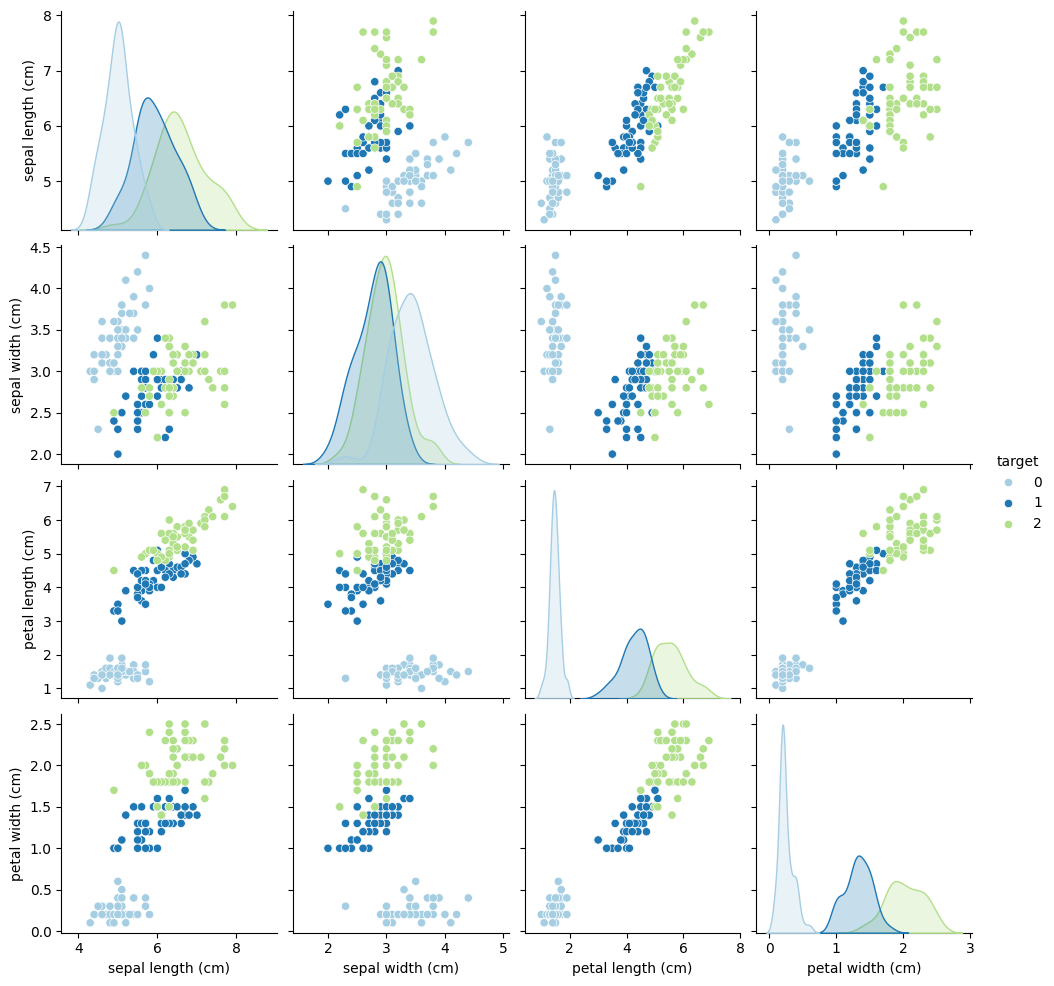

In [28]:
# plotting the paiplot before removing outliers
sns.pairplot(data=iris_combined,hue='target',palette='Paired')

In [29]:
# removal of outliers from feature dataset
outlier_mask=((iris_X < (Q1 - 1.5*IQR)) | (iris_X > (Q3 + 1.5*IQR))).any(axis=1)
print(outlier_mask)

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool


In [30]:
# removal of corresponding row in target variable and feature dataset that were removed in the outlier mask
cleaned_iris_features=iris_X[~outlier_mask]
cleaned_iris_target=iris_y[~outlier_mask]
cleaned_iris_combined=pd.concat([cleaned_iris_features,cleaned_iris_target],axis=1)

In [31]:
cleaned_iris_combined.shape

(146, 5)

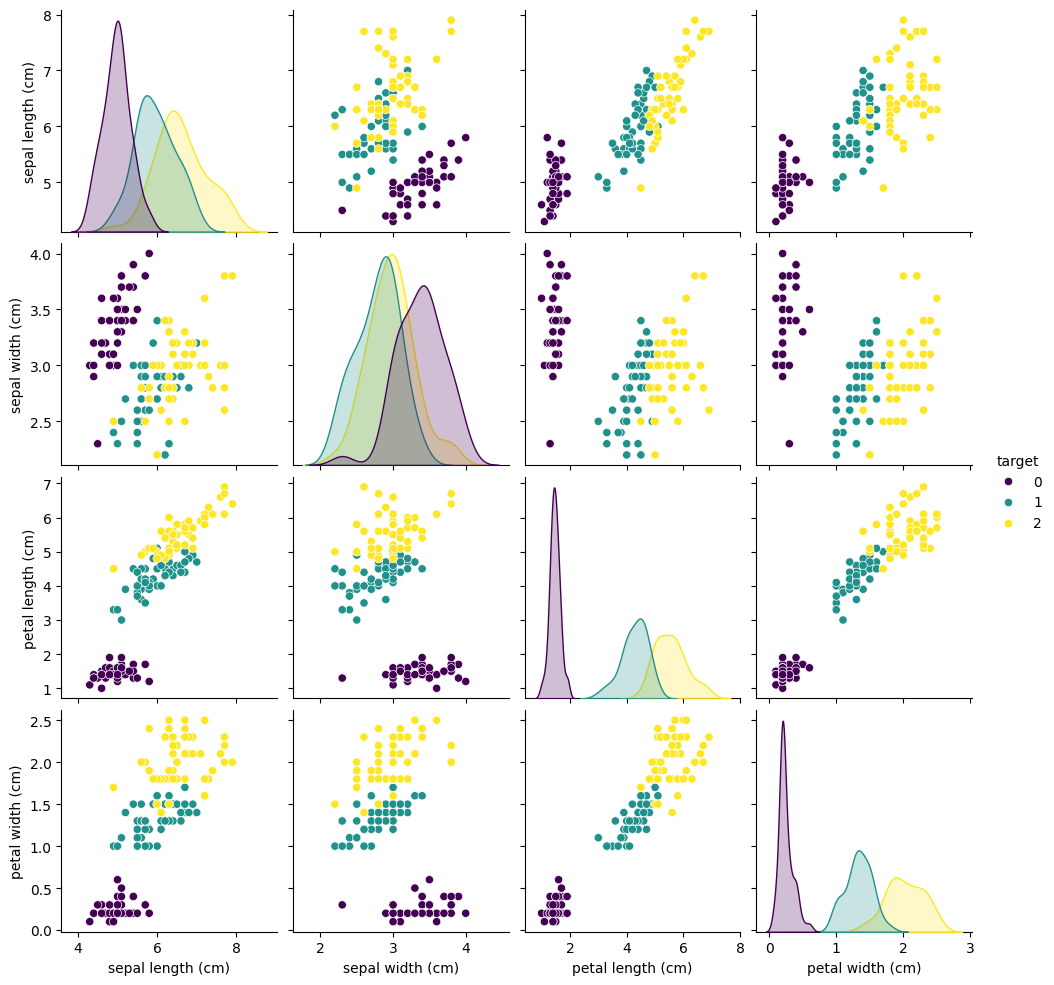

In [32]:
# plotting pairplot after removing outliers
sns.pairplot(data=cleaned_iris_combined,hue='target',palette='viridis')

In [33]:
# dividing the data into feature data and target column
X=cleaned_iris_combined.drop(['target'],axis=1)
y=cleaned_iris_combined['target']

In [34]:
# dividing into train and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=42)

In [35]:
# importing Decision Tree , Random forest and support vector classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
model_DecisionTree=DecisionTreeClassifier()
model_RandomForest=RandomForestClassifier()
model_Support_Vector_Classifier=SVC()

In [36]:
# fitting the train data into the models
model_DecisionTree.fit(xtrain,ytrain)
model_RandomForest.fit(xtrain,ytrain)
model_Support_Vector_Classifier.fit(xtrain,ytrain)

SVC()

In [37]:
# getting predictions for train and test data
predictions_test_for_DecisionTree=model_DecisionTree.predict(xtest)
predictions_test_for_RandomForest=model_RandomForest.predict(xtest)
predictions_test_for_Support_Vector_Classifier=model_Support_Vector_Classifier.predict(xtest)

predictions_train_for_DecisionTree=model_DecisionTree.predict(xtrain)
predictions_train_for_RandomForest=model_RandomForest.predict(xtrain)
predictions_train_for_Support_Vector_Classifier=model_Support_Vector_Classifier.predict(xtrain)

In [38]:
# evaluating the accuracy of various models

from sklearn.metrics import accuracy_score,classification_report

print("accuracy on train data")
print(f"accuracy score for decision trees: {accuracy_score(predictions_test_for_DecisionTree,ytest)}")
print(f"accuracy score for decision trees: {accuracy_score(predictions_test_for_RandomForest,ytest)}")
print(f"accuracy score for decision trees: {accuracy_score(predictions_test_for_Support_Vector_Classifier,ytest)}")
print()
print("accuracy on test data")
print(accuracy_score(predictions_train_for_DecisionTree,ytrain))
print(accuracy_score(predictions_train_for_RandomForest,ytrain))
print(accuracy_score(predictions_train_for_Support_Vector_Classifier,ytrain))

accuracy on train data
accuracy score for decision trees: 0.9459459459459459
accuracy score for decision trees: 0.9459459459459459
accuracy score for decision trees: 0.9459459459459459

accuracy on test data
1.0
1.0
0.963302752293578


In [39]:
# classification models for respective models
print("classification report for Decision trees")
print(classification_report(predictions_test_for_DecisionTree,ytest))

print("classification report for Random trees")
print(classification_report(predictions_test_for_RandomForest,ytest))

print("classification report for Support vector classifier")
print(classification_report(predictions_test_for_Support_Vector_Classifier,ytest))

classification report for Decision trees
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      0.88      0.88         8
           2       0.92      0.92      0.92        13

    accuracy                           0.95        37
   macro avg       0.93      0.93      0.93        37
weighted avg       0.95      0.95      0.95        37

classification report for Random trees
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      0.88      0.88         8
           2       0.92      0.92      0.92        13

    accuracy                           0.95        37
   macro avg       0.93      0.93      0.93        37
weighted avg       0.95      0.95      0.95        37

classification report for Support vector classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        